In [14]:
from src.datasets import ThingsMEGDataset


# データの確認

In [15]:
train_set = ThingsMEGDataset("train", "data")

val_set = ThingsMEGDataset("val", "data")

test_set = ThingsMEGDataset("test", "data")


In [16]:
train_set


In [17]:
# train
print("=== train ===")
# データサイズ
print(len(train_set))
# 3番目のデータ
print(len(train_set[2]))
print(train_set[2])
print(train_set[2][0].shape)

# val
print("=== val ===")
print(len(val_set))
print(len(val_set[1]))
print(val_set[1])
print(val_set[1][0].shape)

# test
print("=== test ===")
print(len(test_set))
print(len(test_set[2]))
print(test_set[2])
print(test_set[2][0].shape)


=== train ===
65728
3
(tensor([[-0.8684, -1.3512, -0.8256,  ..., -0.8039, -1.5160, -1.0658],
        [-0.5087, -0.5633, -0.1187,  ..., -2.2858, -3.3537, -2.9062],
        [ 0.0885, -0.3724, -0.2974,  ..., -2.5506, -3.7884, -3.6018],
        ...,
        [ 0.6323,  0.2463, -0.2650,  ..., -0.3365, -0.4336, -0.9121],
        [-0.2075, -0.1536, -0.2615,  ...,  0.1124,  0.0472, -0.1219],
        [-1.5922, -1.4689, -0.9149,  ..., -1.9177, -1.8777, -1.4202]]), tensor(626), tensor(0))
torch.Size([271, 281])
=== val ===
16432
3
(tensor([[ 1.7594,  1.6767,  1.0630,  ..., -2.7883, -2.3485, -1.0546],
        [ 1.9286,  2.2507,  1.7769,  ..., -1.0647, -0.9009, -0.0463],
        [ 1.8900,  2.0532,  1.7212,  ..., -1.0936, -0.8736,  0.0341],
        ...,
        [ 1.1190,  0.8067,  0.9348,  ..., -1.5889,  1.5030,  4.0634],
        [ 1.0534,  1.0994,  1.0094,  ...,  0.5897,  1.5983,  1.9848],
        [ 0.4264, -0.7464, -0.7318,  ..., -8.6192, -6.5577, -4.4360]]), tensor(966), tensor(0))
torch.Size([271

### 学習データ
- サンプル数: 65728
- [`脳波(271x281)`, `クラス(1)`, `？(1)`]
- 脳波
  - チャンネル数`271`: 測定しているセンサが271個ある。[センサの位置関係](https://mne.tools/1.6/auto_examples/visualization/meg_sensors.html#ctf)も考慮に値する。
  - 系列長`281`: サンプル数が281回ということ。[サンプリングレートは200[Hz]](https://github.com/ailorg/dl_lecture_competition_pub/tree/MEG-competition-omni?tab=readme-ov-file#%E6%9B%B4%E6%96%B0)。
- クラス
  - 1854種類あるうちのどれか
  - 1854種類の詳細は`data/images/`のサブディレクトリ名

### 検証データ
- サンプル数: 16432 (訓練データの4分の1)
- 他は同じ

### テストデータ
- サンプル数: 16432 (訓練データの4分の1)
- [`脳波(271x281)`, `？(1)`]
  - クラス(正解ラベル)を除いたもの

# 脳波

In [40]:
import matplotlib.pyplot as plt


In [43]:
def plot_sample(data, title=None):
    # 適当に4つのチャンネルを選択
    num_samples_to_plot = 4
    indices = np.random.choice(sample_data.shape[0], num_samples_to_plot, replace=False)

    num_samples, length = len(indices), data.shape[1]
    fig, axes = plt.subplots(num_samples, 1, figsize=(15, num_samples*2))
    if title:
        fig.suptitle(title, fontsize=16)

    for i, idx in enumerate(indices):
        axes[i].plot(data[idx])
        axes[i].set_xlim(0, length)
        axes[i].set_ylim(data.min(), data.max())
        axes[i].set_ylabel(f"Sample {idx+1}")

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # adjust the top so the title fits
    plt.show()


torch.Size([271, 281])


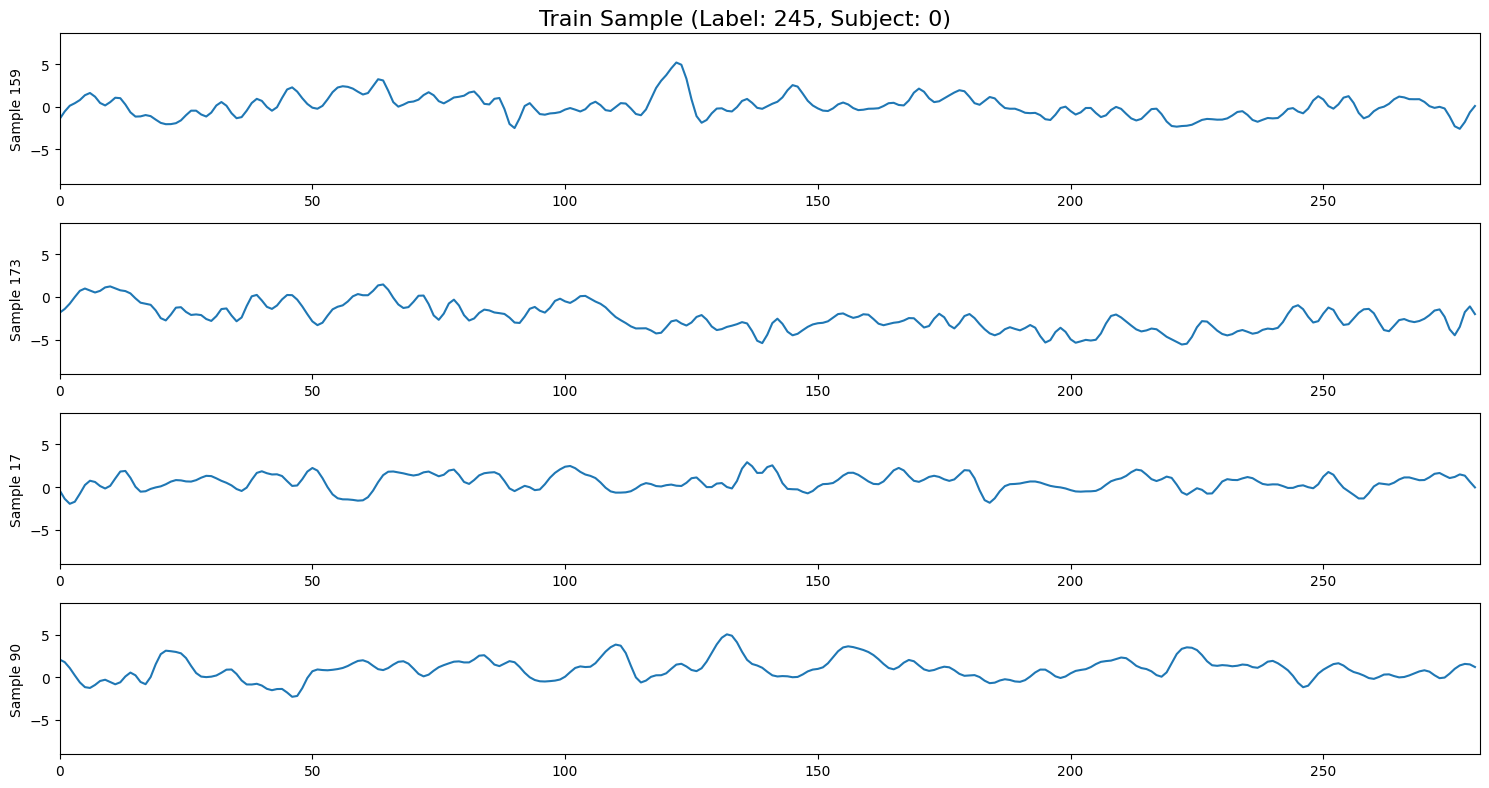

In [65]:
# データの取り出し
idx = 3
sample_data, sample_label, sample_subject = train_set[idx]

# データの形状を確認
print(sample_data.shape)

# データの可視化
plot_sample(sample_data.numpy(), title=f"Train Sample (Label: {sample_label}, Subject: {sample_subject})")


# クラス
各クラスの代表的な画像。  
ラベル番号とクラス名のつながりがよくわからない。`train_image_path`に書いてあるのがそうなのか。

In [21]:
import os
import numpy as np
from PIL import Image


In [22]:
def get_class_name_and_image(data_dir, label_number):
    subdirs = sorted(os.listdir(data_dir))
    if label_number < 0 or label_number >= len(subdirs):
        raise ValueError(f"Invalid label number: {label_number}")
    
    class_name = subdirs[label_number]
    class_dir = os.path.join(data_dir, class_name)
    
    images = sorted(os.listdir(class_dir))
    if len(images) == 0:
        raise ValueError(f"No images found in directory: {class_dir}")
    
    first_image_path = os.path.join(class_dir, images[0])
    return class_name, first_image_path


In [23]:
def show_image(image_path, title="Image"):
    img = Image.open(image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(np.asarray(img))
    plt.title(title)
    plt.axis('off')
    plt.show()


Class Name: abacus


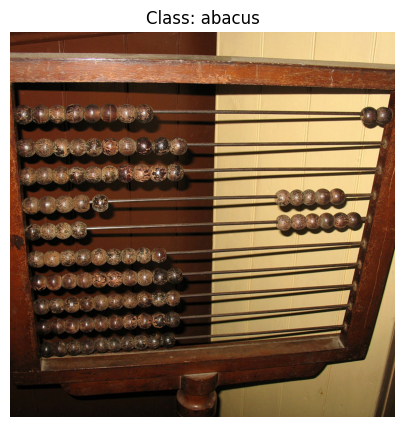

In [24]:
data_dir = "data/Images"
label_number = 1

try:
    class_name, image_path = get_class_name_and_image(data_dir, label_number)
    print(f"Class Name: {class_name}")
    show_image(image_path, title=f"Class: {class_name}")
except ValueError as e:
    print(e)


# 前処理の詳細
> We used MNE-python (Gramfort et al., 2013) to preprocess the MEG data. We bandpass filtered the raw data for each run between 0.1 and 40 Hz. For two participants (M1 and M2), there was a complete MEG signal dropout in one run which lasted for less than 200ms. We replaced this segment of the data with the median sensor response before epoching. To mark trial onsets in the continuous MEG recordings, we used parallel port triggers and the signal of an optical sensor which detects light changes on the display and can thus account for temporal delays between the computer and the projector. We used the signal from the optical sensor to epoch the continuous data from –100ms to 1300ms relative to stimulus onset. We then baseline corrected the epoched data by subtracting the mean and dividing by the standard deviation of the data during baseline (100ms before stimulus onset).Next, we excluded one sensor (MRO11) for all participants which was regularly unlocked and thus yielded very noisy responses. After all preprocessing steps were completed, data were downsampled to 200 Hz to reduce computational load for downstream analyses.

1. 0.1~40[Hz]に限定するフィルターを適用
2. M1,M2の2名の欠損値を中央値で補間
3. エポック化(-100~1300[ms])
4. ベースライン補正
5. `MRO11`というセンサで取得されたノイジーなデータを除外
6. 200[Hz]にダウンサンプリング

### 追加で出来そうな前処理
- ノッチフィルタリング
  - 電源ノイズなど特定の周波数を除去
  - データ取得したドイツは50[Hz]
- リサンプリング
  - サンプリングレートを変更してみる
- アーティファクトの除去
  - ICAクラスを使用
- 個人ごとにデータを正規化
  - 引用: https://ipsj.ixsq.nii.ac.jp/ej/?action=repository_uri&item_id=221017&file_id=1&file_no=1
  - 7%の精度向上らしい
- その他
  - データ拡張
  - MNE-Pythonで提供される前処理の中から効くものを調べる
    - https://mne.tools/stable/api/preprocessing.html#module-mne.preprocessing
  - KaggleのBirdCLEFとか音声系で近しいコンペから良さそうな前処理を見つける

In [82]:
# データの値を確認
print("(Before) Data range:", sample_data.min(), sample_data.max())

# データのスケーリング
scaled_data = (sample_data - sample_data.mean()) / sample_data.std()

print("(After) Data range:", scaled_data.min(), scaled_data.max())


(Before) Data range: tensor(-9.0459) tensor(8.6497)
(After) Data range: tensor(-5.4864) tensor(5.3680)


In [83]:
import numpy as np
import mne


def normalize_data(data):
    """
    データをL2ノルムで正規化します。

    Parameters:
    data (np.ndarray): 入力データ（チャネル x 時間）

    Returns:
    normalized_data (np.ndarray): 正規化されたデータ
    """
    l2_norm = np.linalg.norm(data, axis=1, keepdims=True)
    normalized_data = data / l2_norm
    return normalized_data


In [87]:
def decimate_data(data, sfreq, decim_factor):
    """
    データをダウンサンプリング（デシメーション）します。

    Parameters:
    data (np.ndarray): 入力データ（チャネル x 時間）
    sfreq (float): サンプリング周波数
    decim_factor (int): ダウンサンプリング因子

    Returns:
    decimated_data (np.ndarray): ダウンサンプリングされたデータ
    """
    info = mne.create_info(ch_names=[str(i) for i in range(data.shape[0])], sfreq=sfreq)
    raw = mne.io.RawArray(data, info)
    
    # ローパスフィルタを適用
    raw.filter(l_freq=None, h_freq=sfreq / (2 * decim_factor), picks='all')
    
    # デシメーション
    raw.resample(sfreq / decim_factor)
    decimated_data = raw.get_data()
    return decimated_data


In [88]:
normalized_data = normalize_data(scaled_data)

decimated_data = decimate_data(normalized_data, sfreq=200, decim_factor=10)


Creating RawArray with float64 data, n_channels=271, n_times=281
    Range : 0 ... 280 =      0.000 ...     1.400 secs
Ready.
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 265 samples (1.325 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s


In [89]:
print("Original data shape:", scaled_data.shape)
print("Normalized data shape:", normalized_data.shape)
print("Decimated data shape:", decimated_data.shape)


Original data shape: torch.Size([271, 281])
Normalized data shape: torch.Size([271, 281])
Decimated data shape: (271, 28)


# モデルの工夫
- ベースラインモデル
  ```Python
  ==========================================================================================
  Layer (type:depth-idx)                   Output Shape              Param #
  ==========================================================================================
  BasicConvClassifier                      [1, 1854]                 --
  ├─Sequential: 1-1                        [1, 128, 281]             --
  │    └─ConvBlock: 2-1                    [1, 128, 281]             --
  │    │    └─Conv1d: 3-1                  [1, 128, 281]             104,192
  │    │    └─BatchNorm1d: 3-2             [1, 128, 281]             256
  │    │    └─Conv1d: 3-3                  [1, 128, 281]             49,280
  │    │    └─BatchNorm1d: 3-4             [1, 128, 281]             256
  │    │    └─Dropout: 3-5                 [1, 128, 281]             --
  │    └─ConvBlock: 2-2                    [1, 128, 281]             --
  │    │    └─Conv1d: 3-6                  [1, 128, 281]             49,280
  │    │    └─BatchNorm1d: 3-7             [1, 128, 281]             256
  │    │    └─Conv1d: 3-8                  [1, 128, 281]             49,280
  │    │    └─BatchNorm1d: 3-9             [1, 128, 281]             256
  │    │    └─Dropout: 3-10                [1, 128, 281]             --
  ├─Sequential: 1-2                        [1, 1854]                 --
  │    └─AdaptiveAvgPool1d: 2-3            [1, 128, 1]               --
  │    └─Rearrange: 2-4                    [1, 128]                  --
  │    └─Linear: 2-5                       [1, 1854]                 239,166
  ==========================================================================================
  Total params: 492,222
  Trainable params: 492,222
  Non-trainable params: 0
  Total mult-adds (M): 71.06
  ==========================================================================================
  Input size (MB): 0.30
  Forward/backward pass size (MB): 2.32
  Params size (MB): 1.97
  Estimated Total Size (MB): 4.59
  ==========================================================================================
  ```
  一般的なCNN。

- Bird CLEF 2024 1st Solution([引用](https://www.kaggle.com/competitions/birdclef-2024/discussion/512197))  
  `efficientnet_b0`と`regnety_008`という2つのモデルをImageNetで事前学習してアンサンブル。
  - `efficientnet_b0`
  - `regnety_008`